In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares

In [31]:
def report_params(fit_params_values, fit_param_names):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is', fit_params_values[each])

# define your modules
def pCon1():
    # This is the module for a specific insubstatiation of a constituitive promoter
    # the input is nothing
    # the output is a protein production amount per time unit
    pCon1_production_rate = 100 
    
    return pCon1_production_rate # MEFL minute**-1
    
def pLux1(LuxR, AHL):
    # This is the module for a specific insubstatiation of a lux promoter
    # the input is a LuxR amount and an AHL amount
    # the output is a protein production amount per time unit
    
    # For every promoter there is some function that determines what the promoter's
    #     maximal and basal expression are based on the amount of transcriptional factor
    #     is floating around in the cell. These numbers are empircally determined, and
    #     for demonstration purposes are fictionally and arbitrarily filled in here. 
    #     These functions take the form of hill functions.
    
    basal_n = 2
    basal_basal = 2
    basal_max = 4
    basal_kd = 2
    basal_expression_rate = basal_basal + (basal_max * (LuxR**basal_n / (LuxR**basal_n + basal_kd))) # MEFL minute**-1
    
    max_n = 2
    max_max = 600
    max_kd = 10
    maximal_expression_rate = max_max * (LuxR**max_n / (LuxR**max_n + max_kd)) # MEFL minute**-1
    
    
    pLux1_n = 2
    pLux1_kd = 10
     
    pLux1_production_rate = basal_expression_rate + (maximal_expression_rate * (AHL**pLux1_n / (pLux1_kd + AHL**pLux1_n))) 
    
    return pLux1_production_rate # MEFL minute**-1

def simulation_set_of_equations1(y, dt):
    # Everything else must be hardcoded below. Sorry for the convience. 
    k_loss = 0.1 # A summation of dilution and degredation
    
    # Unpack your current amount of each species
    LuxR, GFP, AHL = y
    
    # Determine the change in each species
    dLuxR = dt * (pCon1() - k_loss*LuxR)
    dGFP = dt * (pLux1(LuxR, AHL) - k_loss*GFP)
    dAHL = dt * 0 # for now we're assuming AHL was added exogenously and never degrades
    
    # Return the change in each species; make sure same order as your init values
    # scipy.odeint will take these values and apply them to the current value of each species in the next time step for you
    return [dLuxR, dGFP, dAHL]

def simulation_set_of_equations2(y, t):
    # Everything else must be hardcoded below. Sorry for the convience. 
    k_loss = 0.1 # A summation of dilution and degredation
    
    # Unpack your current amount of each species
    LuxR, GFP, AHL = y
    
    # Determine the change in each species
    dLuxR = pCon1() - k_loss*LuxR
    dGFP = pLux1(LuxR, AHL) - k_loss*GFP
    dAHL = 0 # for now we're assuming AHL was added exogenously and never degrades
    
    # Return the change in each species; make sure same order as your init values
    # scipy.odeint will take these values and apply them to the current value of each species in the next time step for you
    return [dLuxR, dGFP, dAHL]

# Initial Conditions
# LuxR, GFP, AHL
Species = [10, 0, 10000]

# Timesteps
ODE_minutes = 40
timesteps = 10000
dt = ODE_minutes / timesteps

init_P = [10, 0, 10000]
t_ODE = np.linspace(0, ODE_minutes, timesteps) 
numP_ODE = odeint(simulation_set_of_equations2, init_P, t_ODE)

numP_custom = []
for i in range(0, len(Species)):
    numP_custom.append([])
t = 0
timepoints = []
while t<ODE_minutes:
    # Log the amount of each species
    for i in range(0, len(Species)):
        numP_custom[i].append(Species[i])
        
    # Calculate the change in each species and apply it to the current
    change_in_species = simulation_set_of_equations1(Species, dt)
    Species = np.add(Species, change_in_species)

    # increment time
    timepoints.append(t)
    t += dt

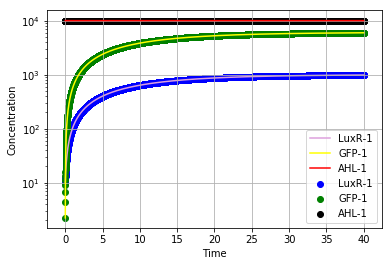

In [32]:
plt.plot(t_ODE, numP_ODE[:,0], c='plum', zorder=1, label = 'LuxR-1')
plt.plot(t_ODE, numP_ODE[:,1], c='yellow', label = 'GFP-1')
plt.plot(t_ODE, numP_ODE[:,2], c='red', label = 'AHL-1')
plt.scatter(timepoints, numP_custom[0], c='b', label = 'LuxR-1')
plt.scatter(timepoints, numP_custom[1], c='g', label = 'GFP-1')
plt.scatter(timepoints, numP_custom[2], c='black', label = 'AHL-1')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(loc = 'best')
plt.grid()
plt.yscale('log')
plt.show()